<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Анатолий! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Сборный проект-4

Необходимо разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [1]:
#!pip install lightgbm
#!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import RepeatedKFold, cross_validate
from scikeras.wrappers import KerasRegressor
from tqdm.notebook import tqdm
tqdm.pandas()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [3]:
IMG_SIZE = (244, 244) 
BATCH_SIZE = 16
DATA_PATH = './datasets'
TEST_DIR = os.path.join(DATA_PATH, 'test_images')
TRAIN_DIR = os.path.join(DATA_PATH, 'train_images')



<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


Я обратил внимание на выбор размера изображений `IMG_SIZE = (500, 304)`.

Хочу отметить, что сверточная сеть ResNet50, которая здесь используется, была предобучена на датасете ImageNet со стандартным размером входных изображений `224x224` пикселя.

Использование значительно большего размера приводит к двум последствиям:
1.  **Снижение производительности:** Обработка изображений размером `500x304` требует значительно больше вычислительных ресурсов и времени по сравнению со стандартным размером.
2.  **Потенциальное снижение качества:** Так как веса модели оптимизированы под признаки, извлеченные из изображений `224x224`, их применение к картинкам другого масштаба может давать неоптимальные результаты.

Рекомендуется придерживаться стандартного для модели размера `(224, 224)`, если нет веских и экспериментально подтвержденных причин для его изменения. Это ускорит работу кода и будет соответствовать лучшим практикам применения предобученных моделей.
    
    
    
</div>

## 1. Загрузка данных

In [4]:
train_df = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
test_df = pd.read_csv(os.path.join(DATA_PATH, 'test_queries.csv'), sep='|')
crowd_annotations = pd.read_csv(
    os.path.join(DATA_PATH, 'CrowdAnnotations.tsv'), 
    sep='\t', 
    header=None, 
    names=['image', 'query_id', 'match_fraction', 'match_count', 'not_match_count']
)
expert_annotations = pd.read_csv(
    os.path.join(DATA_PATH, '','ExpertAnnotations.tsv'), 
    sep='\t', 
    header=None,
    names=['image', 'query_id', 'exp1', 'exp2', 'exp3']
)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
    
</div>

In [5]:
def table_info(pd_df):
    display(pd_df.head())
    pd_df.info()

In [6]:
table_info(train_df)
table_info(test_df)
table_info(crowd_annotations)
table_info(expert_annotations)

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


Unnamed: 0                     query_id  \
0           0  1177994172_10d143cb8d.jpg#0   
1           1  1177994172_10d143cb8d.jpg#1   
2           2  1177994172_10d143cb8d.jpg#2   
3           3  1177994172_10d143cb8d.jpg#3   
4           4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


image                     query_id  match_fraction  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2             1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2             0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2             0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2             0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2             0.0   

   match_count  not_match_count  
0            3                0  
1            0                3  
2            0                3  
3            0                3  
4            0                3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image            47830 non-null  object 
 1   query_id         47830 non-null  object 
 2   match_fraction   47830 non-null  float64
 3   match_count      47830 non-null  int64  
 4   not_match_count  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


image                     query_id  exp1  exp2  exp3
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2     1     1     1
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2     1     1     2
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2     1     1     2
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2     1     2     2
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2     1     1     2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   exp1      5822 non-null   int64 
 3   exp2      5822 non-null   int64 
 4   exp3      5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


In [7]:
test_df = test_df.drop('Unnamed: 0', axis=1)

In [8]:
train_df[train_df.duplicated()]

Empty DataFrame
Columns: [image, query_id, query_text]
Index: []

In [9]:
test_df[test_df.duplicated()]

Empty DataFrame
Columns: [query_id, query_text, image]
Index: []

In [10]:
crowd_annotations[crowd_annotations.duplicated()]

Empty DataFrame
Columns: [image, query_id, match_fraction, match_count, not_match_count]
Index: []

In [11]:
expert_annotations[expert_annotations.duplicated()]

Empty DataFrame
Columns: [image, query_id, exp1, exp2, exp3]
Index: []

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Таблицы загружены, есть первичное знакомство</div>

Загружены 4 таблицы. Дубликатов и пропусков в данных не обнаружено. Из тестовых данных удалены лишние столбцы.

## 2. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи эти оценки нужно агрегировать — превратить в одну. В качестве агрегации решено выбрать - голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок решено объединить их в одну по какому-то критерию: оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Целевая переменная должна иметь значения от 0 до 1.


In [12]:
len(train_df['image'].unique())

1000

In [13]:
len(test_df['image'].unique())

100

В тренировочной выборке 1000 уникальных изображений. В тестовой - 100.

In [14]:
train_df.merge(test_df, 'inner', 'image')

Empty DataFrame
Columns: [image, query_id_x, query_text_x, query_id_y, query_text_y]
Index: []

In [15]:
train_df.merge(test_df, 'inner', 'query_text')

Empty DataFrame
Columns: [image_x, query_id_x, query_text, query_id_y, image_y]
Index: []

У тренировочной и тестовой выборок нет пересечения по изображания и описаниям.

In [16]:
def display_images(image_paths, descriptions=None, figsize=(15, 10)):

    n_images = len(image_paths)
    n_rows = (n_images + 1) // 2
    
    fig, axes = plt.subplots(n_rows, 2, figsize=figsize)
    axes = axes.flatten() 
    
    for i, (ax, img_path) in enumerate(zip(axes, image_paths)):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')  # Убираем оси
            
        # Добавляем описание
        if descriptions is not None and i < len(descriptions):
            description = descriptions[i]
        else:
            description = os.path.basename(img_path)
            
        ax.set_title(description, fontsize=12, pad=20)
    
    # Скрываем пустые subplots
    for j in range(n_images, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

In [17]:
def display_sample_images(df, dir_path, count=6):
    sample = df.sample(6)
    images = []
    for _, row in sample.iterrows():
        images.append(os.path.join(dir_path, row['image']))

    display_images(images)

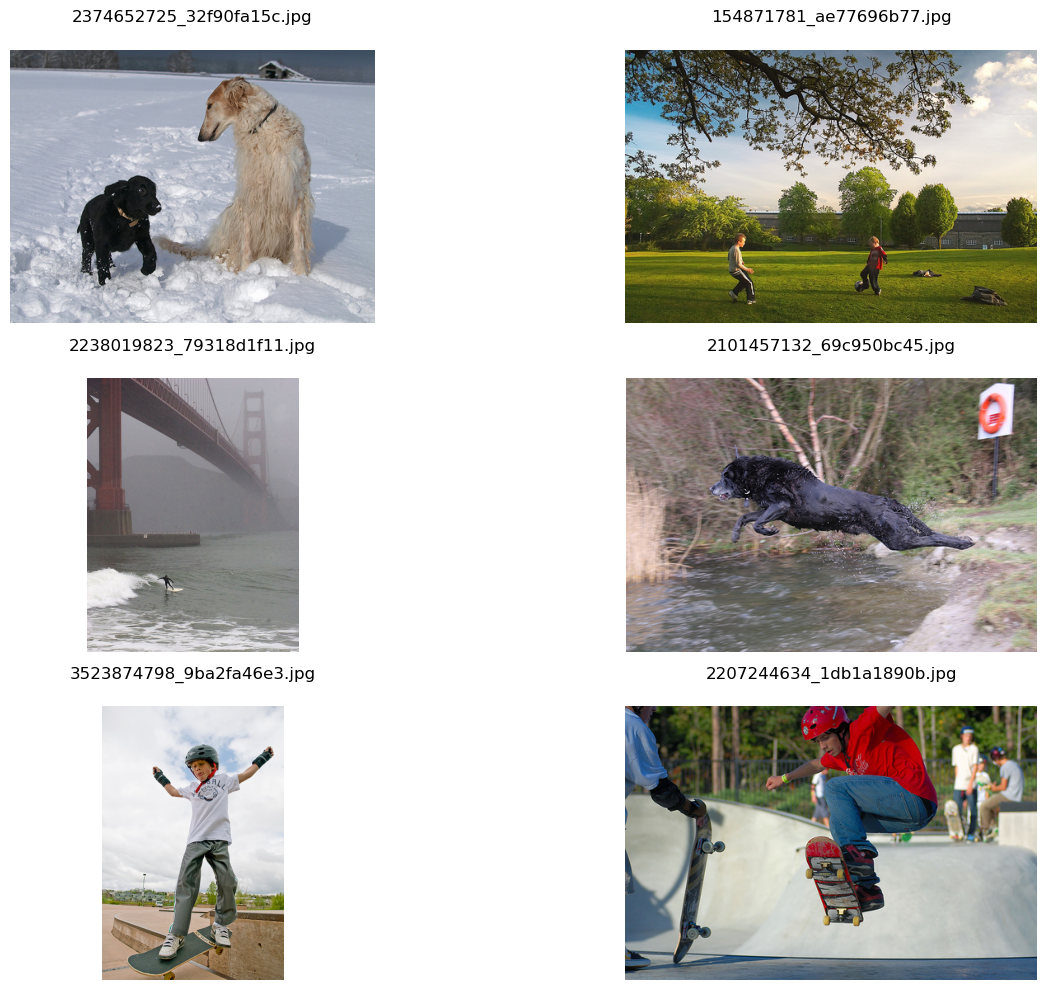

In [18]:
display_sample_images(train_df, TRAIN_DIR)

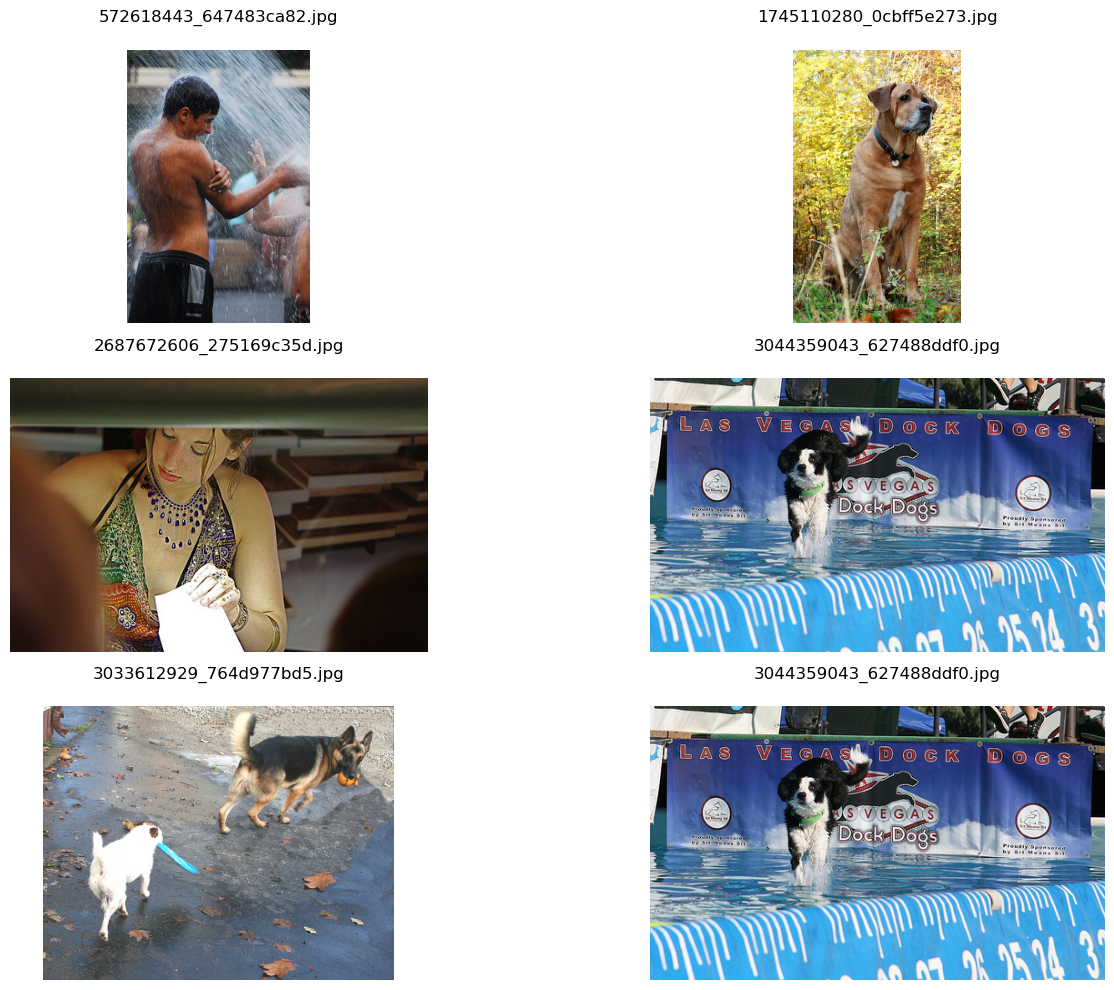

In [19]:
display_sample_images(test_df, TEST_DIR)

Тренировочные данные содержат цветные изображение с разнородным содержимым.

In [20]:
def render_bar(df, col, title, xlabel, ylabel='Частота'):
    plt.suptitle(title)
    bar = df[col].value_counts().plot(kind='bar', rot=0)
    bar.set_xlabel(xlabel);
    bar.set_ylabel(ylabel);

In [21]:
def render_hist(df, col, title, xlabel, ylabel='Частота', bins=30):
    plt.suptitle(title)
    hist = df[col].hist(bins=bins);
    hist.set_xlabel(xlabel);
    hist.set_ylabel(ylabel);

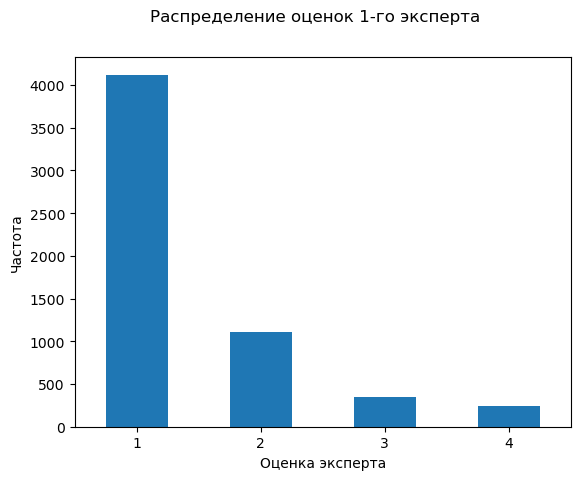

In [22]:
render_bar(expert_annotations, 'exp1', 'Распределение оценок 1-го эксперта', 'Оценка эксперта')

In [23]:
expert_annotations['exp1'].describe()

count    5822.000000
mean        1.436620
std         0.787084
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: exp1, dtype: float64

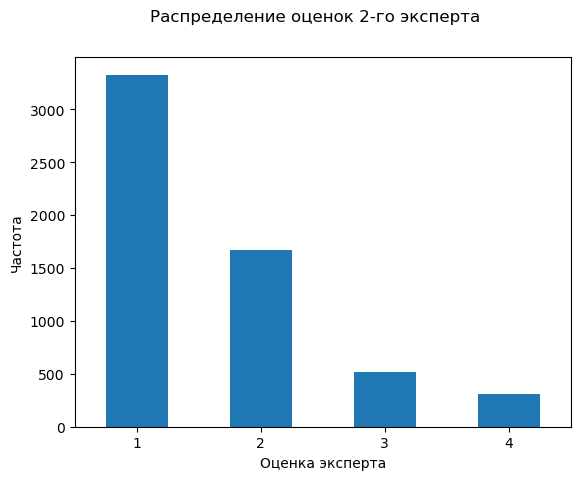

In [24]:
render_bar(expert_annotations, 'exp2', 'Распределение оценок 2-го эксперта', 'Оценка эксперта')

In [25]:
expert_annotations['exp2'].describe()

count    5822.000000
mean        1.624356
std         0.856222
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: exp2, dtype: float64

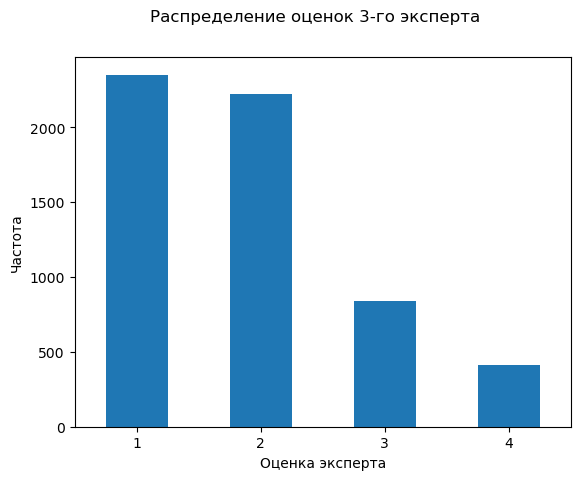

In [26]:
render_bar(expert_annotations, 'exp3', 'Распределение оценок 3-го эксперта', 'Оценка эксперта')

In [27]:
expert_annotations['exp3'].describe()

count    5822.000000
mean        1.881999
std         0.904087
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: exp3, dtype: float64

Средняя оценка у 3-х экспертов составляет ~ 1.6. Можно сделать вывод чаще всего изображения в тренировочном наборе не совпадают с описанием.

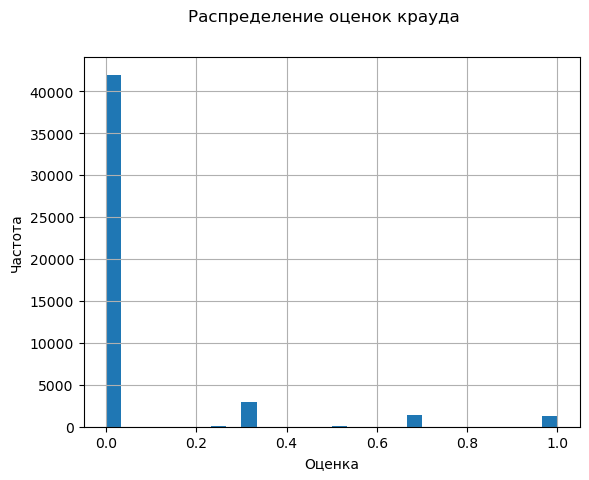

In [28]:
render_hist(crowd_annotations, 'match_fraction', 'Распределение оценок крауда', 'Оценка')

In [29]:
crowd_annotations['match_fraction'].describe()

count    47830.000000
mean         0.068786
std          0.207532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: match_fraction, dtype: float64

Средняя оценка у крауда ~ 0.07, медиана - 0. Можно предположить что большинство описаний в крауде тоже оценивают как не соответсвующих изображению.

In [30]:
expert_annotations['true_image'] = expert_annotations.apply(lambda row: row['query_id'][:-2], axis=1)

In [31]:
expert_annotations.loc[expert_annotations['image'] == expert_annotations['true_image'], ['exp1', 'exp2', 'exp3']].describe()

exp1        exp2   exp3
count  158.000000  158.000000  158.0
mean     3.898734    3.987342    4.0
std      0.360288    0.112150    0.0
min      1.000000    3.000000    4.0
25%      4.000000    4.000000    4.0
50%      4.000000    4.000000    4.0
75%      4.000000    4.000000    4.0
max      4.000000    4.000000    4.0

In [32]:
crowd_annotations['true_image'] = crowd_annotations.apply(lambda row: row['query_id'][:-2], axis=1)

In [33]:
crowd_annotations.loc[crowd_annotations['image'] == crowd_annotations['true_image'], 'match_fraction'].describe()

count    721.000000
mean       0.912575
std        0.170732
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: match_fraction, dtype: float64

Если рассмастривать как эксперты и крауд оценивают соответствие описания к "родному" изображению, то можно сделать вывод, что правильность их ответов выше 90%.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Давай будем честными - исследовательского анализа в этом разделе нет. Ты приступаешь к работе с данными (трансформации) не проведя EDA.


Твой первоначальный обзор данных с помощью `.info()` и `.head()` — это хороший старт для знакомства с датасетами. Однако, чтобы сформировать полную картину и принять обоснованные решения по предобработке, исследовательский анализ (EDA) стоит сделать более глубоким.

Вот несколько направлений для исследования, которые помогут лучше понять данные:

* **Проанализировать размеры и уникальность данных:** Сколько всего оценок в экспертном и крауд-наборах? Сколько уникальных изображений и текстовых запросов в обучающей и тестовой выборках? Пересекаются ли картинки или тексты между `train` и `test`?
* **Исследовать распределения оценок:** Чем отличаются оценки экспертов (шкала от 1 до 4) от оценок краудсорсеров (доля от 0 до 1)? Какое у них среднее, медиана? Визуализируй эти распределения, чтобы наглядно увидеть разницу.
* **Обратить внимание на структуру `query_id`:** В нем зашита полезная информация: формат `<имя_файла>#<номер>` позволяет точно определить, какое описание является "родным" для какого изображения. Это можно использовать для анализа качества разметки (насколько хорошо оцениваются "родные" пары).
* **Познакомиться с самими изображениями:** Выведи несколько случайных картинок из обучающей и тестовой выборок, чтобы получить визуальное представление о данных.

Проведя такой анализ, ты сможешь сделать обоснованные выводы о том, какие данные использовать для формирования целевой переменной, стоит ли доверять больше экспертам или краудсорсерам, и как в целом построить дальнейший пайплайн предобработки.    
    
</div>
    


In [34]:
# В каждой строке датасета выбирает ту оценку, котору больше всего экспертов выбрало
def agg_experts(row):
    values = [0, 0, 0, 0]
    values[row['exp1']-1] += 1
    values[row['exp2']-1] += 1
    values[row['exp3']-1] += 1
    maximum = max(values)
    if maximum > 1: # если какую-то оценку поставили больше 1-го раза
        row['agg_experts'] = values.index(maximum) + 1
    return row


In [35]:
expert_annotations = expert_annotations.apply(agg_experts, axis=1)
expert_annotations = expert_annotations[expert_annotations['agg_experts'].notna()] # Берем только те строки где удалось агрегировать оценки экспертов
expert_annotations = expert_annotations.drop(['exp1', 'exp2', 'exp3'], axis=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


Я заметил, что в вашем коде используется разный стиль для именования переменных и функций. Например, встречаются имена в стиле `camelCase`, такие как `crowdAnnotations`, `expertAnnotations`, `agg_experts`, `aggMatch`, `imgToVecDic`.

В сообществе Python принято следовать официальному руководству по стилю кода, которое называется **PEP 8**. Согласно этому стандарту, для именования переменных и функций следует использовать стиль `snake_case`, где все слова пишутся в нижнем регистре и разделяются символом подчеркивания.

**Примеры из вашего кода и их исправление согласно PEP 8:**
* `crowdAnnotations` -> `crowd_annotations`
* `aggMatch` -> `agg_match`
* `imgToVecDic` -> `img_to_vec_dic`
* `prepData` -> `prep_data`

Соблюдение единого стиля делает код более читаемым, понятным и профессиональным, особенно при работе в команде. Рекомендую взять за правило всегда следовать PEP 8 в своих проектах.    
</div>

In [36]:
table_info(expert_annotations)

agg_experts                      image                     query_id  \
0          1.0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1          1.0  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
2          1.0  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2   
3          2.0  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2   
4          1.0  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2   

                  true_image  
0  2549968784_39bfbe44f9.jpg  
1  2718495608_d8533e3ac5.jpg  
2  3181701312_70a379ab6e.jpg  
3  3207358897_bfa61fa3c6.jpg  
4  3286822339_5535af6b93.jpg

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   agg_experts  5696 non-null   float64
 1   image        5696 non-null   object 
 2   query_id     5696 non-null   object 
 3   true_image   5696 non-null   object 
dtypes: float64(1), object(3)
memory usage: 222.5+ KB


In [37]:
united_annotations = pd.merge(expert_annotations, crowd_annotations, on=['query_id', 'image'], how='left')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

По объединению экспертных и крауд оценок все ОК, но подсвечу возможные альтернативы
    
--------------    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

In [38]:
table_info(united_annotations)

agg_experts                      image                     query_id  \
0          1.0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1          1.0  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
2          1.0  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2   
3          2.0  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2   
4          1.0  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2   

                true_image_x  match_fraction  match_count  not_match_count  \
0  2549968784_39bfbe44f9.jpg             0.0          0.0              3.0   
1  2718495608_d8533e3ac5.jpg             0.0          0.0              3.0   
2  3181701312_70a379ab6e.jpg             NaN          NaN              NaN   
3  3207358897_bfa61fa3c6.jpg             NaN          NaN              NaN   
4  3286822339_5535af6b93.jpg             NaN          NaN              NaN   

                true_image_y  
0  2549968784_39bfbe44f9.jpg  
1  2718495608_d8533e3ac5.jpg  
2                        NaN  
3                        NaN  
4                        NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   agg_experts      5696 non-null   float64
 1   image            5696 non-null   object 
 2   query_id         5696 non-null   object 
 3   true_image_x     5696 non-null   object 
 4   match_fraction   2258 non-null   float64
 5   match_count      2258 non-null   float64
 6   not_match_count  2258 non-null   float64
 7   true_image_y     2258 non-null   object 
dtypes: float64(4), object(4)
memory usage: 356.1+ KB


In [39]:
# Объединяет оценки экспертов и крауда в одну общую с коэффициентами 0,6 и 0,4 соответственно
def agg_match(row):
    exp_coef = 0.6 # Коэффициент с которым принимаются оценки экспертов (экспертам доверяем больше)
    cr_coef = 0.4 # Коэффициент с которым принимаются оценки крауда

    adjusted_agg = (row['agg_experts']-1)/3 # приведем к диапазону [0, 1]

    if row['match_fraction'] >= 0:
        row['target'] = adjusted_agg*exp_coef + row['match_fraction']*cr_coef
    else:
        row['target'] = (adjusted_agg)/3 # Там где нет оценок крауда будем полностью полагаться на оценки экспертов
    return row

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


Я изучил вашу функцию `aggMatch` для объединения оценок экспертов и краудсорсеров.

Логика, которую вы реализовали, математически корректна, однако она является избыточно сложной и менее читаемой, чем могла бы быть. Использование "магических чисел", выведенных вручную (вроде `divider = 2.2`), затрудняет понимание и поддержку кода.

Гораздо более простым, стандартным и прозрачным подходом является разделение этой задачи на два независимых шага:

1.  **Приведение к единому масштабу:** Сначала нужно привести все оценки к единому диапазону `[0, 1]`. Оценка краудсорсеров уже находится в этом диапазоне. Для экспертной оценки (которая находится в диапазоне `[1, 4]`) применяется простое линейное преобразование:
    ```python
    # expert_score находится в диапазоне [1, 4]
    normalized_expert = (expert_score - 1) / 3
    # normalized_expert теперь в диапазоне [0, 1]
    ```
2.  **Комбинация:** Затем, когда обе оценки находятся в одном масштабе, можно легко произвести их взвешенное суммирование:
    ```python
    target = normalized_expert * 0.6 + crowd_score * 0.4
    ```

Такой подход не требует вычисления специальных "делителей", он интуитивно понятен, и его легко модифицировать (например, если потребуется изменить веса). Рекомендую в будущем придерживаться такого пошагового, модульного подхода к преобразованию данных.
</div>

In [40]:
united_annotations = united_annotations.apply(agg_match, axis=1)

In [41]:
united_annotations = united_annotations.drop(['agg_experts', 'match_fraction', 'match_count', 'not_match_count', 'true_image_y'], axis=1)
table_info(united_annotations)

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2   

                true_image_x    target  
0  2549968784_39bfbe44f9.jpg  0.000000  
1  2718495608_d8533e3ac5.jpg  0.000000  
2  3181701312_70a379ab6e.jpg  0.000000  
3  3207358897_bfa61fa3c6.jpg  0.111111  
4  3286822339_5535af6b93.jpg  0.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5696 non-null   object 
 1   query_id      5696 non-null   object 
 2   true_image_x  5696 non-null   object 
 3   target        5696 non-null   float64
dtypes: float64(1), object(3)
memory usage: 178.1+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, получен датафрейм признаки-таргет, с которым мы продолжим работать (чистить, векторизовть).</div>

На данном этапе произведено объединение оценок экспертов с оценками крауда в одну оценку с коэффициентами 0,6 и 0,4 соответственно. Эта оценка и будет нашим таргетом и принимает значения 0 <= таргет <= 1.

## 3. Проверка данных

Все данные, которые содержат в описание слова, относящиеся к детям до 16 лет нужно удалить.

In [42]:
train_df = pd.merge(train_df, united_annotations, on=['query_id', 'image'], how='inner')

In [43]:
forbidden_words = [
    'child', 'children', 'boy', 'boys', 'girl', 'girls', 'baby', 'teen', 'teenager', 'infant', 'suckling', 'babe', 'toddler', 'newborn',
    'preschooler', 'preteen', 'youngster'
]

In [44]:
train_df['query_text'] = train_df['query_text'].str.lower()

In [45]:
train_df = train_df[~(train_df['query_text'].str.contains('|'.join(forbidden_words), regex=True) & train_df['true_image_x'] == train_df['image'])]
table_info(train_df)

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  \
0  a young child is wearing blue goggles and sitt...   
1  a young child is wearing blue goggles and sitt...   
2  a young child is wearing blue goggles and sitt...   
3  a young child is wearing blue goggles and sitt...   
4  a young child is wearing blue goggles and sitt...   

                true_image_x  target  
0  2549968784_39bfbe44f9.jpg     0.0  
1  2549968784_39bfbe44f9.jpg     0.0  
2  2549968784_39bfbe44f9.jpg     0.2  
3  2549968784_39bfbe44f9.jpg     1.0  
4  2549968784_39bfbe44f9.jpg     0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5696 non-null   object 
 1   query_id      5696 non-null   object 
 2   query_text    5696 non-null   object 
 3   true_image_x  5696 non-null   object 
 4   target        5696 non-null   float64
dtypes: float64(1), object(4)
memory usage: 222.6+ KB


In [46]:
table_info(train_df)

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  \
0  a young child is wearing blue goggles and sitt...   
1  a young child is wearing blue goggles and sitt...   
2  a young child is wearing blue goggles and sitt...   
3  a young child is wearing blue goggles and sitt...   
4  a young child is wearing blue goggles and sitt...   

                true_image_x  target  
0  2549968784_39bfbe44f9.jpg     0.0  
1  2549968784_39bfbe44f9.jpg     0.0  
2  2549968784_39bfbe44f9.jpg     0.2  
3  2549968784_39bfbe44f9.jpg     1.0  
4  2549968784_39bfbe44f9.jpg     0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5696 non-null   object 
 1   query_id      5696 non-null   object 
 2   query_text    5696 non-null   object 
 3   true_image_x  5696 non-null   object 
 4   target        5696 non-null   float64
dtypes: float64(1), object(4)
memory usage: 222.6+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

В соответствии с заданием, были удалены данные потенциально содержащие информацию о детях до 16 лет. Было удалено более 1000 строк данных.

## 4. Векторизация изображений и текста

In [47]:
def create_resnet50_vectorizer():
    # Загружаем ResNet50 без верхних слоев
    base_model = ResNet50(
        weights='imagenet',      # Предобученные веса
        include_top=False,       # Убираем полносвязные слои
        pooling='avg'            # Global Average Pooling
    )
    
    # Создаем модель для извлечения признаков
    feature_extractor = Model(
        inputs=base_model.input, 
        outputs=base_model.output
    )
    
    return feature_extractor

# Создаем векторизатор
resnet_vectorizer = create_resnet50_vectorizer()

def vectorize_image_resnet50(img_path, target_size=IMG_SIZE):

    # Загрузка и предобработка изображения
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Добавляем batch dimension
    img_array = preprocess_input(img_array)        # Препроцессинг для ResNet50
    
    # Извлечение признаков
    features = resnet_vectorizer.predict(img_array, verbose=0)
    
    return features.flatten()  # Преобразуем в 1D вектор


In [48]:
# Создает словарь, где ключ имя файла, значение векторизорованное значение изображения
def imgToVecDic(path, fileNames):
    imgToVecDic = {} # Словарь, где ключ имя файла, значение векторизорованное значение изображения
    for x in os.listdir(path):
        if x in fileNames:
            image_path = os.path.join(path, x)
            imgToVecDic[x] = vectorize_image_resnet50(image_path)
    return imgToVecDic

In [49]:
# Функция для чистки текста от символов не являющихся текстом
def clear_text(text):
    pattern = r'[^a-zA-z]'
    return " ".join(re.sub(pattern, ' ', text).split())

In [50]:
nltk.download('punkt_tab')      
nltk.download('wordnet')    
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to C:\Users\KDFX
[nltk_data]     Modes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KDFX
[nltk_data]     Modes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KDFX
[nltk_data]     Modes\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\KDFX Modes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\KDFX
[nltk_data]     Modes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KDFX Modes\AppData\Roaming\nltk_dat

In [51]:
# Функция для лемматизация текста
def lemmatizeText(text):
    wordnet = WordNetLemmatizer()

    result = ""

    for token,tag in pos_tag(word_tokenize(clear_text(text))):
        pos=tag[0].lower()
                
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result += " " + wordnet.lemmatize(token,pos)

    return result

In [52]:
# Лемматизирует каждую строку в датасете
def lemmatize(row):
    row['lemm'] = lemmatizeText(row['query_text'])
    return row

In [53]:
# Подготовка данных для обучения: векторизация изображений и описаний, затем их конкатенация в один вектор
def prepData(path, df, imgs):
    imgToVecDicTmp = imgToVecDic(path, imgs)
    
    def imgsToVec(row):
        row['img_vec'] = imgToVecDicTmp[row['image']]

        return row
    
    df = df.progress_apply(imgsToVec, axis=1)
    df = df.progress_apply(lemmatize, axis=1)
    tfidfVectorizer = TfidfVectorizer(stop_words=list(stop_words), ngram_range=(1, 3))
    tf_idf = tfidfVectorizer.fit_transform(df['lemm'].values)
    df['txt_vec'] = tf_idf.toarray().tolist()

    df['group_column'] = df.progress_apply(
        lambda row: np.concatenate([row['img_vec'], row['txt_vec']]), 
        axis=1
    )

    return df, tfidfVectorizer

In [54]:
train_df, tfidfVectorizer = prepData(TRAIN_DIR, train_df, train_df['image'].unique())

  0%|          | 0/5696 [00:00<?, ?it/s]

  0%|          | 0/5696 [00:00<?, ?it/s]

  0%|          | 0/5696 [00:00<?, ?it/s]

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Подсвечу пример места хардкодом путей. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">



Я вижу, что вся логика векторизации изображений, обработки текста и финальной сборки признаков инкапсулирована в одной большой функции `prepData`. Хотя эта функция и выполняет поставленную задачу, такой подход "всё в одном" имеет серьезные недостатки: он затрудняет отладку, проверку и понимание кода.

Хорошей практикой при решении таких многоэтапных задач является принцип **"простых шаги и самопроверки"**. Вместо одной большой функции, лучше разбить процесс на логические блоки и после каждого блока проверять промежуточный результат.

**Пример более надежного подхода:**

1.  **Шаг 1: Векторизация изображений.**
    * Создать отдельную структуру данных (например, словарь или DataFrame) только для векторов изображений: `{'image_id': vector}`.
    * **Самопроверка:** После этого шага вывести количество полученных векторов и размерность (`.shape`) одного из них. Убедиться, что всё корректно. `len(image_vectors_dict)`, `image_vectors_dict['some_image.jpg'].shape`.

2.  **Шаг 2: Векторизация текстов.**
    * Отдельно подготовить тексты и получить матрицу TF-IDF.
    * **Самопроверка:** Вывести размерность этой матрицы (`tfidf_matrix.shape`). Убедиться, что количество строк совпадает с количеством текстов, а количество столбцов — с размером словаря.

3.  **Шаг 3: Сборка итогового датасета.**
    * Присоединить векторы изображений к основному датафрейму (например, через `.map()` или `.merge()`).
    * Собрать итоговую матрицу признаков, например, с помощью `np.hstack`.
    * **Самопроверка:** Вывести итоговую размерность матрицы `X` (`X.shape`). Убедиться, что количество строк соответствует размеру выборки, а количество столбцов равно сумме размерностей векторов картинки и текста.

Такой пошаговый подход позволяет на каждом этапе контролировать процесс, вовремя замечать ошибки и делает код гораздо более читаемым и поддерживаемым. Также это позволяет выявить неэффективные операции, такие как многократное использование `.apply()`, и заменить их на быстрые векторизованные альтернативы.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте для векторизации текстов неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

In [55]:
train_df = train_df[['image', 'group_column', 'target']]
table_info(train_df)

image  \
0  1056338697_4f7d7ce270.jpg   
1  1262583859_653f1469a9.jpg   
2  2447284966_d6bbdb4b6e.jpg   
3  2549968784_39bfbe44f9.jpg   
4  2621415349_ef1a7e73be.jpg   

                                        group_column  target  
0  [0.17210182547569275, 0.04948651045560837, 0.0...     0.0  
1  [0.48963022232055664, 0.4815792739391327, 0.22...     0.0  
2  [0.31532102823257446, 0.28832125663757324, 0.5...     0.2  
3  [0.23267972469329834, 0.15311284363269806, 0.1...     1.0  
4  [0.7564011812210083, 0.13152167201042175, 0.10...     0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         5696 non-null   object 
 1   group_column  5696 non-null   object 
 2   target        5696 non-null   float64
dtypes: float64(1), object(2)
memory usage: 133.6+ KB


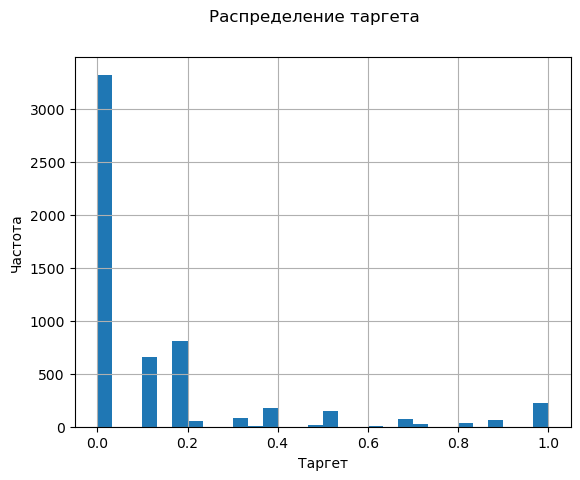

In [56]:
plt.suptitle('Распределение таргета')
target_hist = train_df['target'].hist(bins=30);
target_hist.set_xlabel('Таргет');
target_hist.set_ylabel('Частота');

В данном разделе произведена векторизация изображений с помощью сверточной сети ResNet-50, натренированной на датасете ImageNet. Векторизация текстов описания изображений выполнена методом tf-idf. Затем вектора изображений и соответствуещие вектора описаний были сконкатенированны. Именно эти вектора и будут входными данными для обучения модели. Так же можно заметить, что целевое значение не является непрерывным значением и наиболее частое значение это 0, других значиний значительно меньше, что может сказаться на качестве предсказаний модели.

## 5. Обучение модели предсказания соответствия

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

В качестве метрики выбрана MAE. Такая метрика выбрана, т.к. она показвает результат в тех же единицах измерения, что и целевая переменная и ее будет легко интерпретировать. Также она нечувствительна к выбросам в данных.

In [57]:
X = np.vstack(train_df['group_column'].values)
y = train_df['target'].values

In [58]:
groups = train_df['image'].values

gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, valid_indices = next(gss.split(X, y, groups=groups))

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">


Давай внимательно посмотрим на код, где ты разделяешь данные на обучающую и тестовую выборки с помощью `GroupShuffleSplit`. Здесь ты допустил критическую методологическую ошибку, которая приводит к **утечке данных** (data leakage) и делает оценку качества твоей модели недействительной.

Смысл `GroupShuffleSplit` в этой задаче — гарантировать, что все строки, относящиеся к одному и тому же **изображению**, попадут целиком либо в обучение, либо в тест. Это нужно, чтобы модель не "подсматривала" в тестовые данные.

Ты же в качестве групп (`groups`) передаешь `train_df.index.values`. Поскольку индексы у каждой строки уникальны, ты фактически говоришь сплиттеру, что каждая строка — это отдельная группа.

**К чему это приводит:**
`GroupShuffleSplit` в таких условиях перестает работать как групповой сплиттер и превращается в аналог обычного `ShuffleSplit`. Это приводит к тому, что одна и та же картинка (с разными описаниями) оказывается и в обучающей, и в тестовой выборке. Модель обучается на определенном изображении, а затем проходит тест на нем же. Полученная на таком "загрязненном" тесте метрика MAE не отражает реальной способности твоей модели работать с новыми, невиданными ранее данными.

**Правильная реализация:**
В качестве групп необходимо использовать идентификаторы изображений:

```python
# НЕПРАВИЛЬНО:
# groups = train_df.index.values

# ПРАВИЛЬНО:
groups = train_df['image'].values

# ... остальной код без изменений
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X, y, groups=groups))
```

Пожалуйста, внеси это исправление. Это фундаментальный аспект корректной валидации моделей.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

In [59]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search_lr = GridSearchCV(
    LinearRegression(),
    param_grid_lr,
    cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True,
    n_jobs=-1
)

grid_search_lr.fit(X[train_indices], y[train_indices])
 
best_model_lr = grid_search_lr.best_estimator_
print("Лучшие параметры:", grid_search_lr.best_params_)
print("MAE на кроссвалидации:", -grid_search_lr.best_score_)

Лучшие параметры: {'fit_intercept': False, 'positive': True}
MAE на кроссвалидации: 0.15028621197389383


In [60]:
lrPred = best_model_lr.predict(X[valid_indices])
print("MAE на валидационной выборке", mean_absolute_error(y[valid_indices], lrPred))

MAE на валидационной выборке 0.16356841022293714


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">


Я вижу, ты попробовал обучить и сравнить несколько разных моделей. Это правильный подход в любом DS-проекте. Однако я обнаружил критическую ошибку в самой **методологии сравнения моделей**, из-за которой твои выводы о том, какая модель лучше, некорректны.

Твои модели соревнуются в разных условиях, поэтому определить настоящего победителя невозможно.

**Вот в чем заключается ошибка:**

1.  Для `LinearRegression` и `LGBMRegressor` ты используешь `GridSearchCV`. Итоговая метрика, которую ты получаешь (`-rnd_search_lgbm.best_score_`), — это **средняя MAE по 5 фолдам кросс-валидации**, рассчитанная на **тренировочной** части данных (`X[train_indices]`).

2.  Для нейронной сети ты получаешь метрику MAE путем оценки на **единой отложенной валидационной** выборке (`X[test_indices]`).

Сравнивать среднюю оценку с кросс-валидации с оценкой на одной отложенной выборке — это методологически неверно. Это как сравнивать средний балл спортсмена за 5 попыток с результатом другой попытки другого спортсмена.

**Как провести сравнение корректно (принцип "честного турнира"):**

Чтобы сравнение было честным, все модели должны быть обучены и протестированы в абсолютно одинаковых условиях.

1.  **Единое разделение:** Раздели данные **один раз** на обучающую (`X_train`, `y_train`) и валидационную (`X_val`, `y_val`) выборки. Для этого идеально подходит `GroupShuffleSplit` (после того как ты исправишь в нем ошибку с группами).

2.  **Обучение на `train`:** Обучи **все** свои модели (и LR, и LGBM, и нейросеть) на **одном и том же** наборе данных — `X_train`, `y_train`. Если для какой-то модели нужно подобрать параметры, делай это тоже только внутри `X_train` (например, с помощью `GridSearchCV` с правильным `GroupKFold`).

3.  **Экзамен на `val`:** Получи предсказания от **каждой** из обученных моделей на **одном и том же** экзаменационном наборе — `X_val`.

4.  **Сравнение:** Рассчитай метрику MAE для каждой модели на этих предсказаниях (`y_val` и `predictions_val`).

Только сравнивая метрики, полученные на **общей для всех валидационной выборке**, ты сможешь сделать корректный вывод о том, какая модель действительно справилась с задачей лучше. Пожалуйста, перестрой свою логику обучения и валидации в соответствии с этим принципом.</div>

In [61]:
def createNet(n_features):
    model = Sequential()

    model.add(Dense(32, input_shape=(n_features,), activation='relu'))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(1, activation='sigmoid')  )

    model.compile(loss='mse', optimizer=Adam(0.0001), metrics=['mae'])

    return model

#Callback для ранней остановки
early_stopping = EarlyStopping(
        monitor='mae',
        patience=20,
        restore_best_weights=True,
        verbose=0
    )

In [62]:
estimator= KerasRegressor(build_fn=createNet(X[train_indices].shape[1]), epochs=500, batch_size=64, verbose=0, callbacks=early_stopping)
kfold= RepeatedKFold(n_splits=5)
cv_results= cross_validate(estimator, X[train_indices], y[train_indices], cv=kfold, n_jobs=-1, scoring='neg_mean_absolute_error', return_estimator=True,)

best_idx = np.argmax(cv_results['test_score'])
net = cv_results['estimator'][best_idx]

print("MAE на кроссвалидации:", -cv_results['test_score'].mean())

c:\pylib\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\pylib\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\pylib\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


MAE на кроссвалидации: 0.17461621889703907


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При анализе кода обучения нейросети я обнаружил критическую ошибку в вызове метода `model.fit()`, которая полностью обесценивает процесс обучения.

Проблема заключается в параметре `steps_per_epoch=1`.

Этот параметр принудительно указывает Keras, что одна "эпоха" должна состоять всего из одного шага (одного батча). В твоем случае размер батча равен 16. Это означает, что модель смотрит на 16 случайных примеров из обучающей выборки, после чего эпоха считается завершенной и запускается валидация. Затем процесс повторяется.

В результате модель никогда не видит бОльшую часть обучающих данных. Полноценного обучения на всем датасете не происходит, и полученные метрики качества не имеют никакого смысла.

**Решение:** Просто удали параметр `steps_per_epoch` из вызова `.fit()`. Keras по умолчанию будет правильно вычислять количество шагов, необходимое для прохождения по всей обучающей выборке в рамках одной эпохи.


</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Я заметил, что на последнем слое твоей сети используется функция активации `relu`. Хотя таргет действительно принимает только положительные значения, `relu` может выдавать предсказания в диапазоне от 0 до бесконечности.

Твоя целевая переменная, однако, имеет более строгие рамки — от 0 до 1.

Для таких задач существует более подходящая функция активации — `sigmoid`. Она математически "сжимает" любое входное значение в диапазон `[0, 1]`, что идеально соответствует структуре твоей целевой переменной.

Рекомендую заменить `activation='relu'` на `activation='sigmoid'` в последнем `Dense` слое. Это поможет модели быстрее научиться делать предсказания в нужном диапазоне.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай рассмотрим несколько стандартных техник, которые помогут значительно улучшить стабильность и качество твоей нейросети.

1.  **`BatchNormalization` и `Dropout`**: Это два практически обязательных слоя для полносвязных сетей.
    * `BatchNormalization` (батч-нормализация) стабилизирует и ускоряет обучение. Ее принято ставить после `Dense` слоя, но до его активации.
    * `Dropout` — это мощный метод борьбы с переобучением. Он случайным образом "выключает" часть нейронов во время обучения. Его ставят после слоя активации.

2.  **Количество эпох и `EarlyStopping`**: Ты используешь `EarlyStopping`, и это правильно. Однако ты ограничиваешь обучение всего 40 эпохами. Смысл `EarlyStopping` в том, чтобы поставить заведомо большое число эпох (например, 500 или 1000) и позволить колбэку самому остановить процесс, когда качество на валидации перестанет расти.

3.  **Размер батча**: Для подобных задач часто лучше работают более крупные батчи (`batch_size`), чем 16. Можешь поэкспериментировать со значениями 64, 128 или даже больше. Это может сделать обучение более стабильным.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

In [63]:
y_pred = net.predict(X[valid_indices]).flatten()
print("MAE на тестовой выборке", mean_absolute_error(y[valid_indices], y_pred))

MAE на тестовой выборке 0.16874215673678425


In [64]:
param_grid_lgbm = {
    'max_depth': [8, 16, 32, 64, -1],
    'num_leaves': [16, 32, 64, 128],
}

rnd_search_lgbm = GridSearchCV(
    LGBMRegressor(),
    param_grid_lgbm,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

rnd_search_lgbm.fit(X[train_indices], y[train_indices])

# Лучшая модель
best_model_lgbm = rnd_search_lgbm.best_estimator_
print("Лучшие параметры:", rnd_search_lgbm.best_params_)
print("Лучший MAE:", -rnd_search_lgbm.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521393
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2419
[LightGBM] [Info] Start training from score 0.144554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [65]:
y_pred = best_model_lgbm.predict(X[valid_indices]).flatten()
print("MAE на тестовой выборке", mean_absolute_error(y[valid_indices], y_pred))

MAE на тестовой выборке 0.14515426340283594


c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Были обучены 3 модели: LinearRegression, полносвязная нейронная сеть и LGBMRegressor. Лучшие показатели у LGBMRegressor. В качестве метрики была выбрана МАЕ. Метрика для лучшей модели составляет ~ 0.15.

## 6. Тестирование модели

In [66]:
test_df_sample = test_df.sample(10)

In [67]:
imgToVecTestDic = imgToVecDic(TEST_DIR, test_df['image'].unique())

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
да, векторизацию тестовых изображени лучше сделать заранее </div>

In [68]:
test_df_sample = test_df_sample.apply(lemmatize, axis=1)
tf_idf = tfidfVectorizer.transform(test_df_sample['lemm'])
test_df_sample['txt_vec'] = tf_idf.toarray().tolist()

In [69]:
image_vec_df = pd.DataFrame({'image': imgToVecTestDic.keys(),'img_vec': imgToVecTestDic.values()})

In [70]:
# Находит наиболее релевантное изображение для векторизированного описания изображения
def findImg(df, tf_idf, model):
    df['group_column'] = df.apply(
            lambda row: np.concatenate([row['img_vec'], tf_idf]), 
            axis=1
    )
    X_pred = np.vstack(df['group_column'].values)
    pred = model.predict(X_pred)
    maxMatch = max(pred)
    maxIndex = np.where(pred==maxMatch)[0][0]
    return maxMatch, df.loc[maxIndex, 'image']

In [71]:
def predToDf(row):
    match, image = findImg(image_vec_df, row['txt_vec'], best_model_lgbm)
    row['match'] = match
    row['match_image'] = image
    return row

In [72]:
test_df_sample = test_df_sample.progress_apply(predToDf, axis=1)
test_df_sample

  0%|          | 0/10 [00:00<?, ?it/s]

c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\pylib\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMR

query_id  \
490   989754491_7e53fb4586.jpg#0   
342  3455405300_aa3069ecaa.jpg#2   
40    186346360_541047336f.jpg#0   
305  3386953179_84c2d7922f.jpg#0   
38   1745110280_0cbff5e273.jpg#3   
25   1468389504_c724bdcad0.jpg#0   
434   404850242_3a55a4c874.jpg#4   
325  3421547427_53411b6278.jpg#0   
273  3211199368_ca78387f72.jpg#3   
222  3089107423_81a24eaf18.jpg#2   

                                            query_text  \
490  A girl in a pool wearing goggles and surrounde...   
342  A group of women wearing red all rally together .   
40   A girl in a bikini top and shorts poses for a ...   
305  A skier makes the only path on an empty mounta...   
38   Stretched image of a brown dog with a white pa...   
25   Two girls in pink are playing on yellow playgr...   
434  A woman wearing a red coat begins to take a pi...   
325  A man in a blue shirt lifts up his tennis rack...   
273  A dog wearing jeans and a shirt stands on the ...   
222                   A man is videotaping something .   

                         image  \
490   989754491_7e53fb4586.jpg   
342  3455405300_aa3069ecaa.jpg   
40    186346360_541047336f.jpg   
305  3386953179_84c2d7922f.jpg   
38   1745110280_0cbff5e273.jpg   
25   1468389504_c724bdcad0.jpg   
434   404850242_3a55a4c874.jpg   
325  3421547427_53411b6278.jpg   
273  3211199368_ca78387f72.jpg   
222  3089107423_81a24eaf18.jpg   

                                                  lemm  \
490   A girl in a pool wear goggles and surround by...   
342       A group of woman wear red all rally together   
40    A girl in a bikini top and short pose for a p...   
305    A skier make the only path on an empty mountain   
38    Stretched image of a brown dog with a white p...   
25    Two girl in pink be play on yellow playground...   
434    A woman wear a red coat begin to take a picture   
325   A man in a blue shirt lift up his tennis rack...   
273   A dog wear jean and a shirt stand on the side...   
222                       A man be videotape something   

                                               txt_vec     match  \
490  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.267934   
342  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.173638   
40   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.347607   
305  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.472976   
38   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.550059   
25   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.306192   
434  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.178002   
325  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.363912   
273  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.474011   
222  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.375034   

                   match_image  
490  2517284816_9b8fd3c6b6.jpg  
342  3722572342_6904d11d52.jpg  
40   3386953179_84c2d7922f.jpg  
305  3386953179_84c2d7922f.jpg  
38   3033612929_764d977bd5.jpg  
25   3386953179_84c2d7922f.jpg  
434  3386953179_84c2d7922f.jpg  
325  3386953179_84c2d7922f.jpg  
273  3262849619_0bc4f88ef9.jpg  
222  3386953179_84c2d7922f.jpg

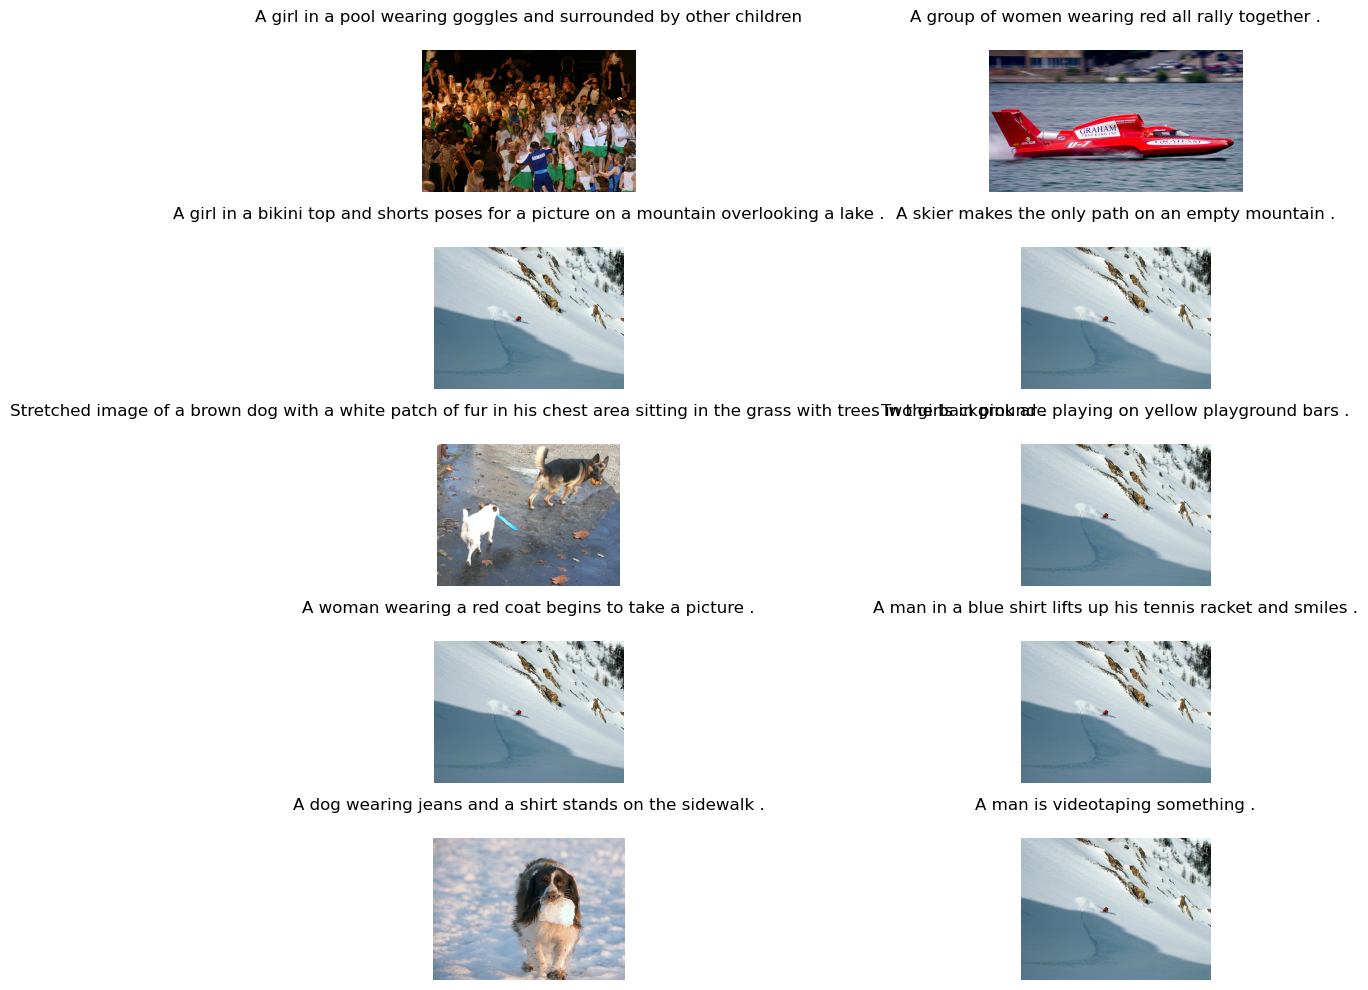

In [73]:
images = []
desc = []
for index, row in test_df_sample.iterrows():
    images.append(os.path.join(TEST_DIR, row['match_image']))
    desc.append(row['query_text'])

display_images(images, desc)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    


Твой пошаговый, "пакетный" подход к тестированию в целом корректен и позволяет получить нужный результат. Для разового анализа в рамках Jupyter-ноутбука он вполне подходит.

Хочу поделиться идеей, как можно было бы структурировать этот код в стиле, более приближенном к реальным "production" задачам. Идеальным решением была бы **единая функция**, которая инкапсулирует в себе всю логику поиска.

Представь себе функцию `find_best_match(query_text, image_vectors, model, ...)`, которая на вход принимает только текстовый запрос (а также заранее посчитанные векторы картинок, обученную модель и т.д.). Внутри себя она бы выполняла все шаги:
1.  **Проверяла** `query_text` на наличие "запрещенных" слов и в случае их нахождения сразу возвращала бы дисклеймер.
2.  **Предобрабатывала и векторизовала** этот один-единственный запрос.
3.  **Создавала** в памяти все пары с векторами тестовых картинок.
4.  **Получала** предсказания от модели для всех пар.
5.  **Находила** картинку с максимальным скором и возвращала ее имя.

Чем такой подход лучше?
* **Модульность:** У тебя появляется одна, полностью самодостаточная функция, которую легко тестировать и переиспользовать в любом другом месте.
* **Читаемость:** Вся логика поиска находится в одном месте, а не распределена по нескольким ячейкам и промежуточным датафреймам (`t1`, `text_query_df` и т.д.).
* **Применимость:** Именно так бы выглядел код, который можно было бы встроить в веб-приложение: получил запрос от пользователя -> вызвал одну функцию -> отдал результат.

Повторюсь, твой текущий код решает поставленную задачу, но на будущее советую стремиться к такому, более функциональному и инкапсулированному стилю.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Но в целом логика работы корректная.  Соатавляются пары  текст/изображение и находится  изображение с максимальной оценокой. Отрабатывают контроль "запрещенного контента".

Видно, что на все запросы модель выдает одно и  то же изображение, И лучом надежды здесь является то, что модель выдает другую картинку при наличии в запросе собаки.
    
    
По опыту скажу - слово dog одно из самых частотных в нашем датасете, поэтому если модель начала отличать людей от собак - значит мы на верном пути   
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert (лучший результат дает модель  `all-MiniLM-L6-v2`)
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.       
    
</div>

Здесь была протестированна лучшая модель, полученная на предыдущем шаге. Для этого были получены эмбеддинги для всех тестовых изображений из папки `test_images`, выберны случайные 10 запросов из файла `test_queries.csv` и для каждого запроса отображено наиболее релевантное изображение. Как можно видеть, качество предсказаний не очень высокое. Модель чаще находит частично совпадающие с описанием изображения, а не те которые полностью совпадают с описанием. 

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

## 7. Выводы

В данной работе необходимо было разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно было обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

Для обучения были представлены данные экспертов и крауда, которые оценивали степеть соответствия изображения его описанию. Данные оценки были объединены в одну оценку с коэффициентами 0,6 и 0,4 соответственно. Эта оценка и является таргетом и принимает значения 0 <= таргет <= 1.

В соответсвии с требованиями задания из обучающей выборки были исключены данные, которые могут потенциально содержать информацию о детях до 16 лет.

Для обучения моделей данные были преобразованны следующим образом. Произведена векторизация изображений с помощью сверточной сети ResNet-50, натренированной на датасете ImageNet. Векторизация текстов описания изображений выполнена методом tf-idf. Затем вектора изображений и соответствуещие вектора описаний были сконкатенированны.

Были обучены 3 модели: LinearRegression, полносвязная нейронная сеть и LGBMRegressor. Лучшие показатели у LGBMRegressor. В качестве метрики была выбрана МАЕ. Метрика для лучшей модели составляет ~ 0.15.

Качество предсказаний лучшей модели на тестовой выборке оказалось не очень высокое. Модель чаще находит частично совпадающие с описанием изображения, а не те которые полностью совпадают с описанием. 

В целом проект по созданию сервиса поиска фотографий по текстовому описанию практически осуществим. Но для повышения качества предсказаний потребуется больше разнородных данных для обучения.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также реализовна логика инференса и с её помощью проведено тестирование.
 
    
Пожалуйста отработай все критичные замечания, которые я подсветил красными комментариями.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>